In [1]:
#This is the 1st backup submission from ASHUTOSH JHA from MANIPAL INSTITUTE OF TECHNOLOGY , REGISTRATION NUMBER 210907370 

In [2]:
#we need to install necessary packages
!pip install visualkeras
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#importing all required libraries for building the cnn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import tensorflow.keras as tk 
import time
import timeit
import visualkeras

2023-07-14 08:13:50.863857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = tk.datasets.fashion_mnist.load_data() # I am loading the dataset from keras directly here

In [5]:
#confirming  the shape of training data 
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
#confirming  the shape of testing data 
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
#demonstrating how data is stored 
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
#defining class labels here
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

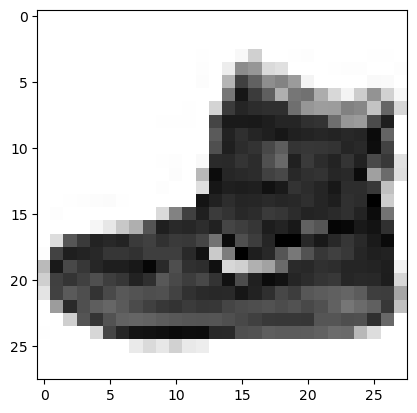

In [10]:
#displaying the image in a specific place on the dataset
plt.imshow(X_train[0], cmap='Greys')

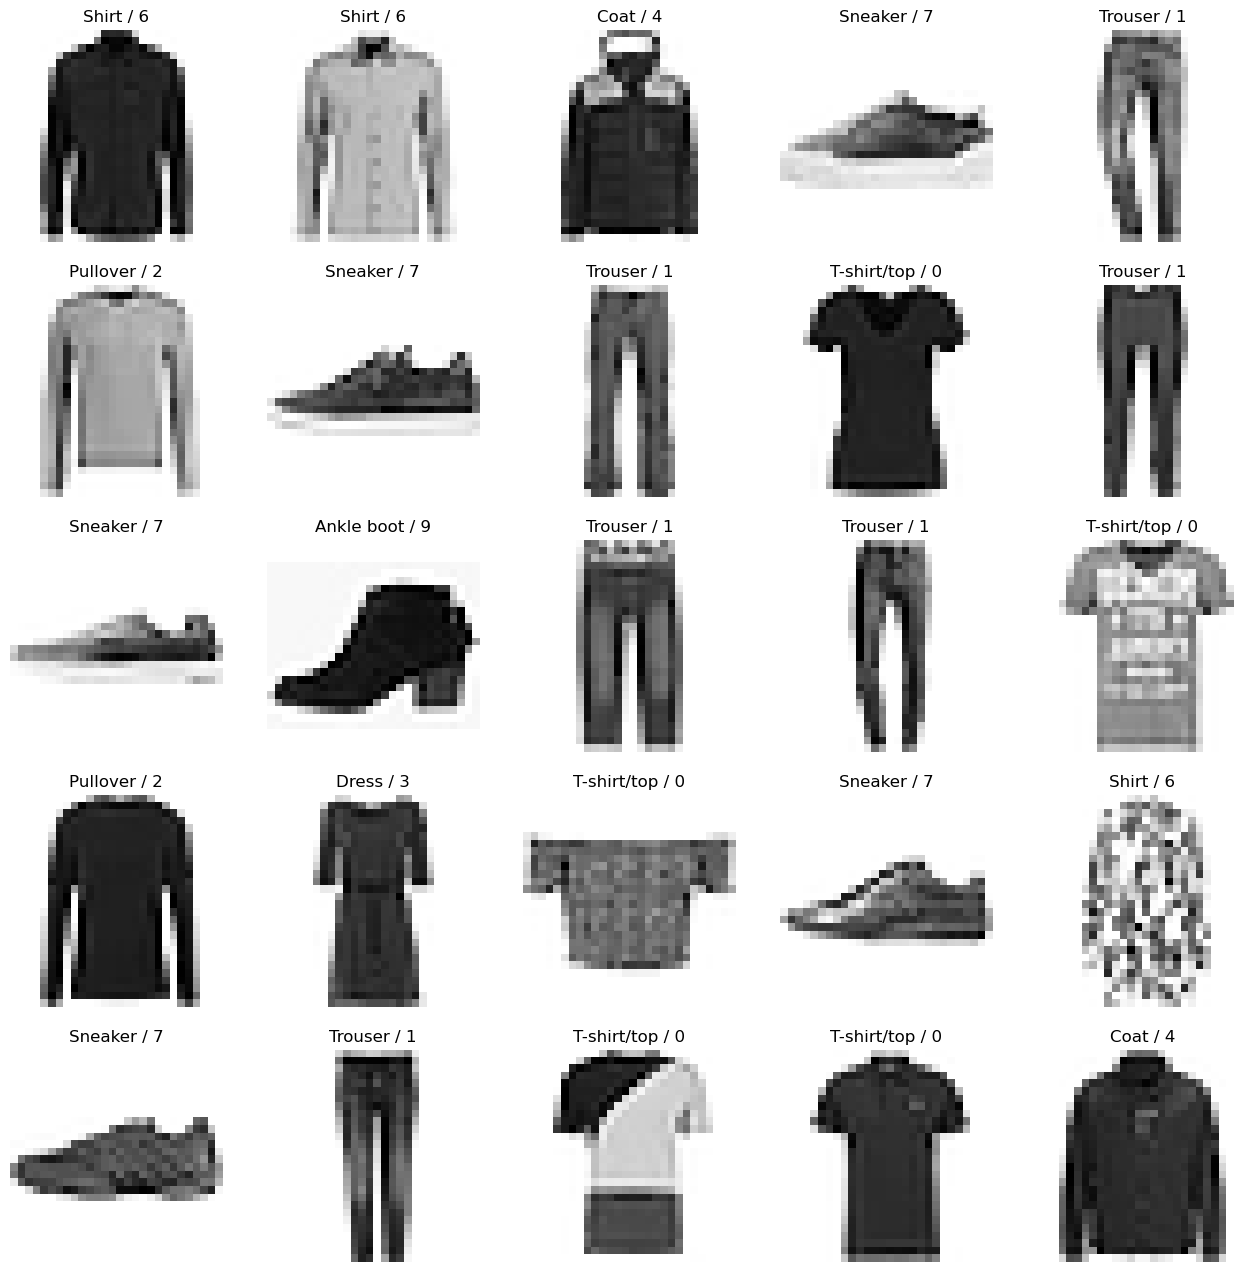

In [11]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [12]:
#making the data array suitable for our cnn architecture built from scratch
X_train.shape
 
X_train.ndim
 
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
 

 
X_train.ndim

4

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)
 
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [15]:
#Building our CNN model from scratch
cnn_model3 = tk.models.Sequential([
                         tk.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tk.layers.MaxPooling2D(pool_size=(2,2)),
                         tk.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tk.layers.MaxPooling2D(pool_size=(2,2)),
                         tk.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tk.layers.MaxPooling2D(pool_size=(2,2)),
                         tk.layers.Flatten(),
                         tk.layers.Dense(units=128, activation='relu'),
                         tk.layers.Dropout(0.25),
                         tk.layers.Dense(units=128, activation='relu'),
                         tk.layers.Dropout(0.5),
                         tk.layers.Dense(units=128, activation='relu'),
                         tk.layers.Dropout(0.25),                        
                         tk.layers.Dense(units=128, activation='relu'),
                         tk.layers.Dropout(0.10),                         
                         tk.layers.Dense(units=10, activation='softmax')
                         ])
 
cnn_model3.summary() # get the summary of model
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
cnn_model3.fit(X_train, y_train, epochs=40, batch_size=64, verbose=1, validation_data=(X_validation, y_validation))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

2023-07-14 08:13:59.832751: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


Epoch 1/40
750/750 [==============================] - 33s 41ms/step - loss: 0.8465 - accuracy: 0.6685 - val_loss: 0.5110 - val_accuracy: 0.8079
Epoch 2/40
750/750 [==============================] - 30s 40ms/step - loss: 0.4996 - accuracy: 0.8168 - val_loss: 0.4093 - val_accuracy: 0.8472
Epoch 3/40
750/750 [==============================] - 31s 41ms/step - loss: 0.4127 - accuracy: 0.8546 - val_loss: 0.3520 - val_accuracy: 0.8735
Epoch 4/40
750/750 [==============================] - 30s 40ms/step - loss: 0.3652 - accuracy: 0.8705 - val_loss: 0.3362 - val_accuracy: 0.8821
Epoch 5/40
750/750 [==============================] - 30s 40ms/step - loss: 0.3321 - accuracy: 0.8830 - val_loss: 0.3353 - val_accuracy: 0.8796
Epoch 6/40
750/750 [==============================] - 30s 40ms/step - loss: 0.3080 - accuracy: 0.8920 - val_loss: 0.3098 - val_accuracy: 0.8917
Epoch 7/40
750/750 [==============================] - 30s 41ms/step - loss: 0.2955 - accuracy: 0.8974 - val_loss: 0.2925 - val_accuracy:

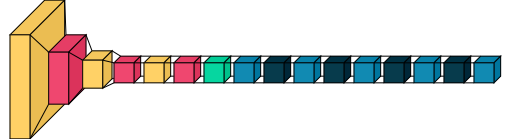

In [16]:
visualkeras.layered_view(cnn_model3)

In [17]:
TF_ENABLE_ONEDNN_OPTS= 1

In [18]:
# Select a sample image for inference
sample_input = X_train[0:1]


In [19]:
# Warm up the model
_ = cnn_model3.predict(sample_input)


1/1 [==============================] - 0s 270ms/step


In [20]:
# Define the number of iterations for measurement
num_iterations = 100

In [21]:
# Function to run the inference and measure the time
def inference_time():
    _ = cnn_model3.predict(sample_input)

In [22]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 17ms/step


In [23]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"optimized Baseline inference latency: {average_latency} seconds")

optimized Baseline inference latency: 0.053852639379911124 seconds


In [24]:
score = cnn_model3.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Optimized Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.9032
Loss: 0.3726
Optimized Accuracy: 0.9032


In [25]:
TF_ENABLE_ONEDNN_OPTS= 0

In [26]:
# Select a sample image for inference
sample_input = X_train[0:1]


In [27]:
# Warm up the model
_ = cnn_model3.predict(sample_input)


1/1 [==============================] - 0s 18ms/step


In [28]:
# Define the number of iterations for measurement
num_iterations = 100

In [29]:
# Function to run the inference and measure the time
def inference_time():
    _ = cnn_model3.predict(sample_input)

In [30]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 17ms/step


In [31]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"Un-optimized Baseline inference latency: {average_latency} seconds")

Un-optimized Baseline inference latency: 0.05068937284057028 seconds


In [32]:
score = cnn_model3.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Un-Optimized Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.9032
Loss: 0.3726
Un-Optimized Accuracy: 0.9032


In [33]:
y_pred = cnn_model3.predict(X_test)
y_pred.round(2)
 
y_test
 
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.9032


[0.3726457953453064, 0.9031999707221985]

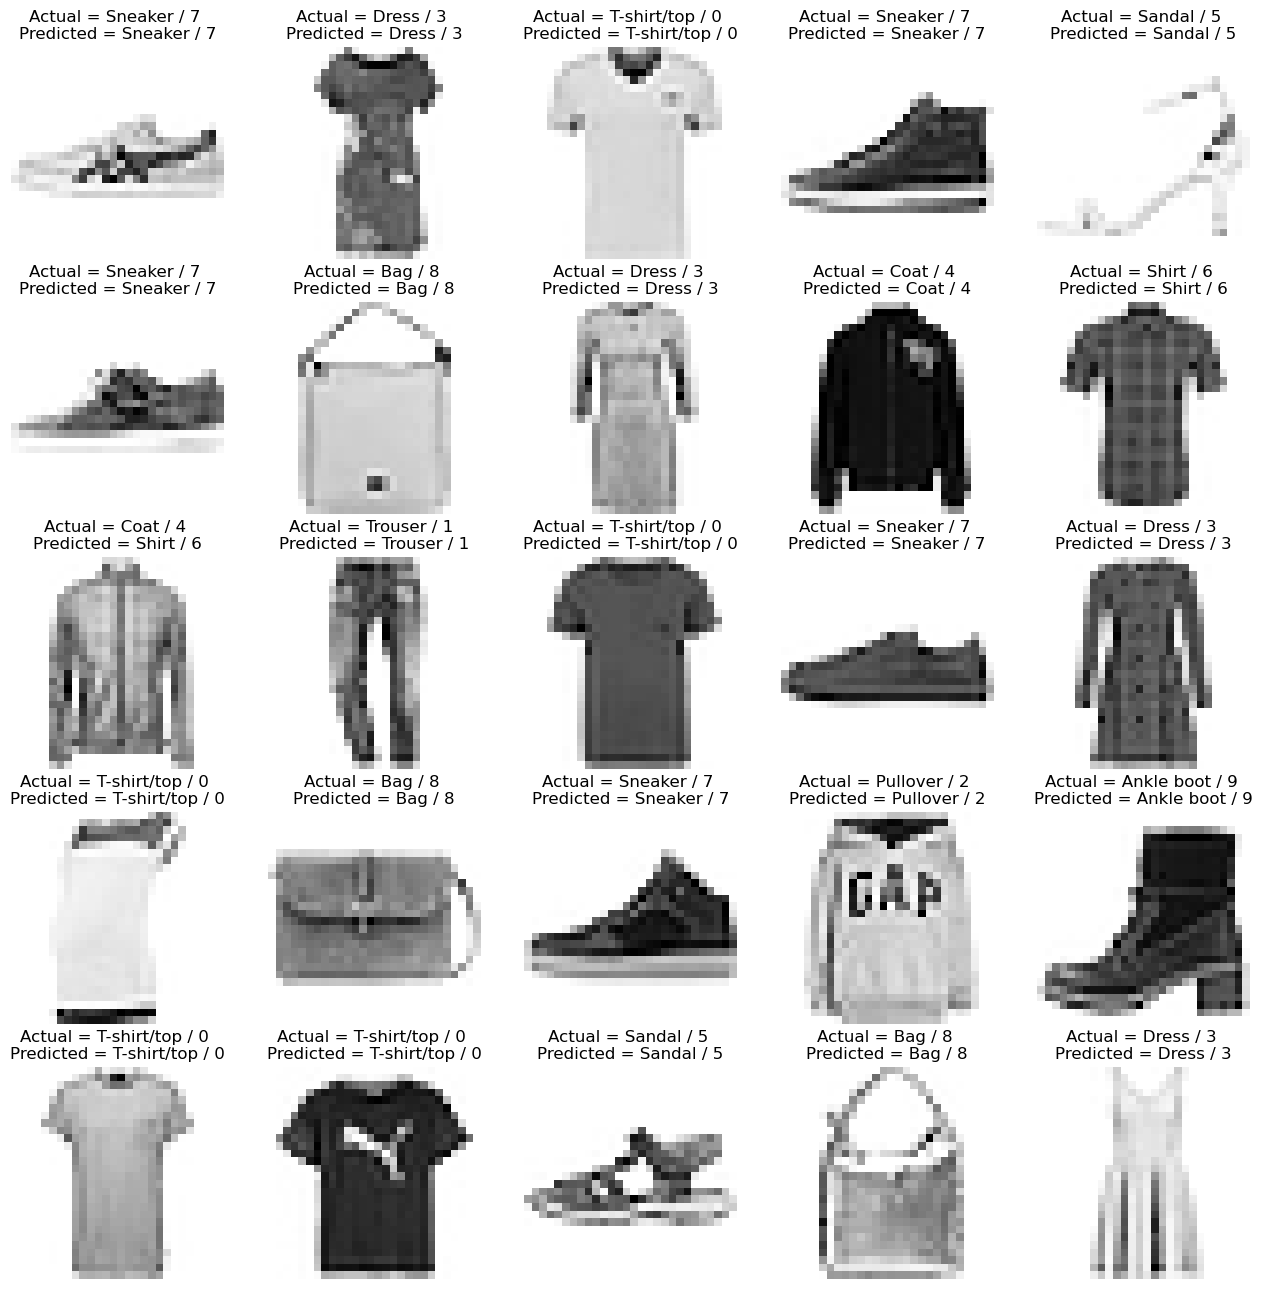

In [34]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

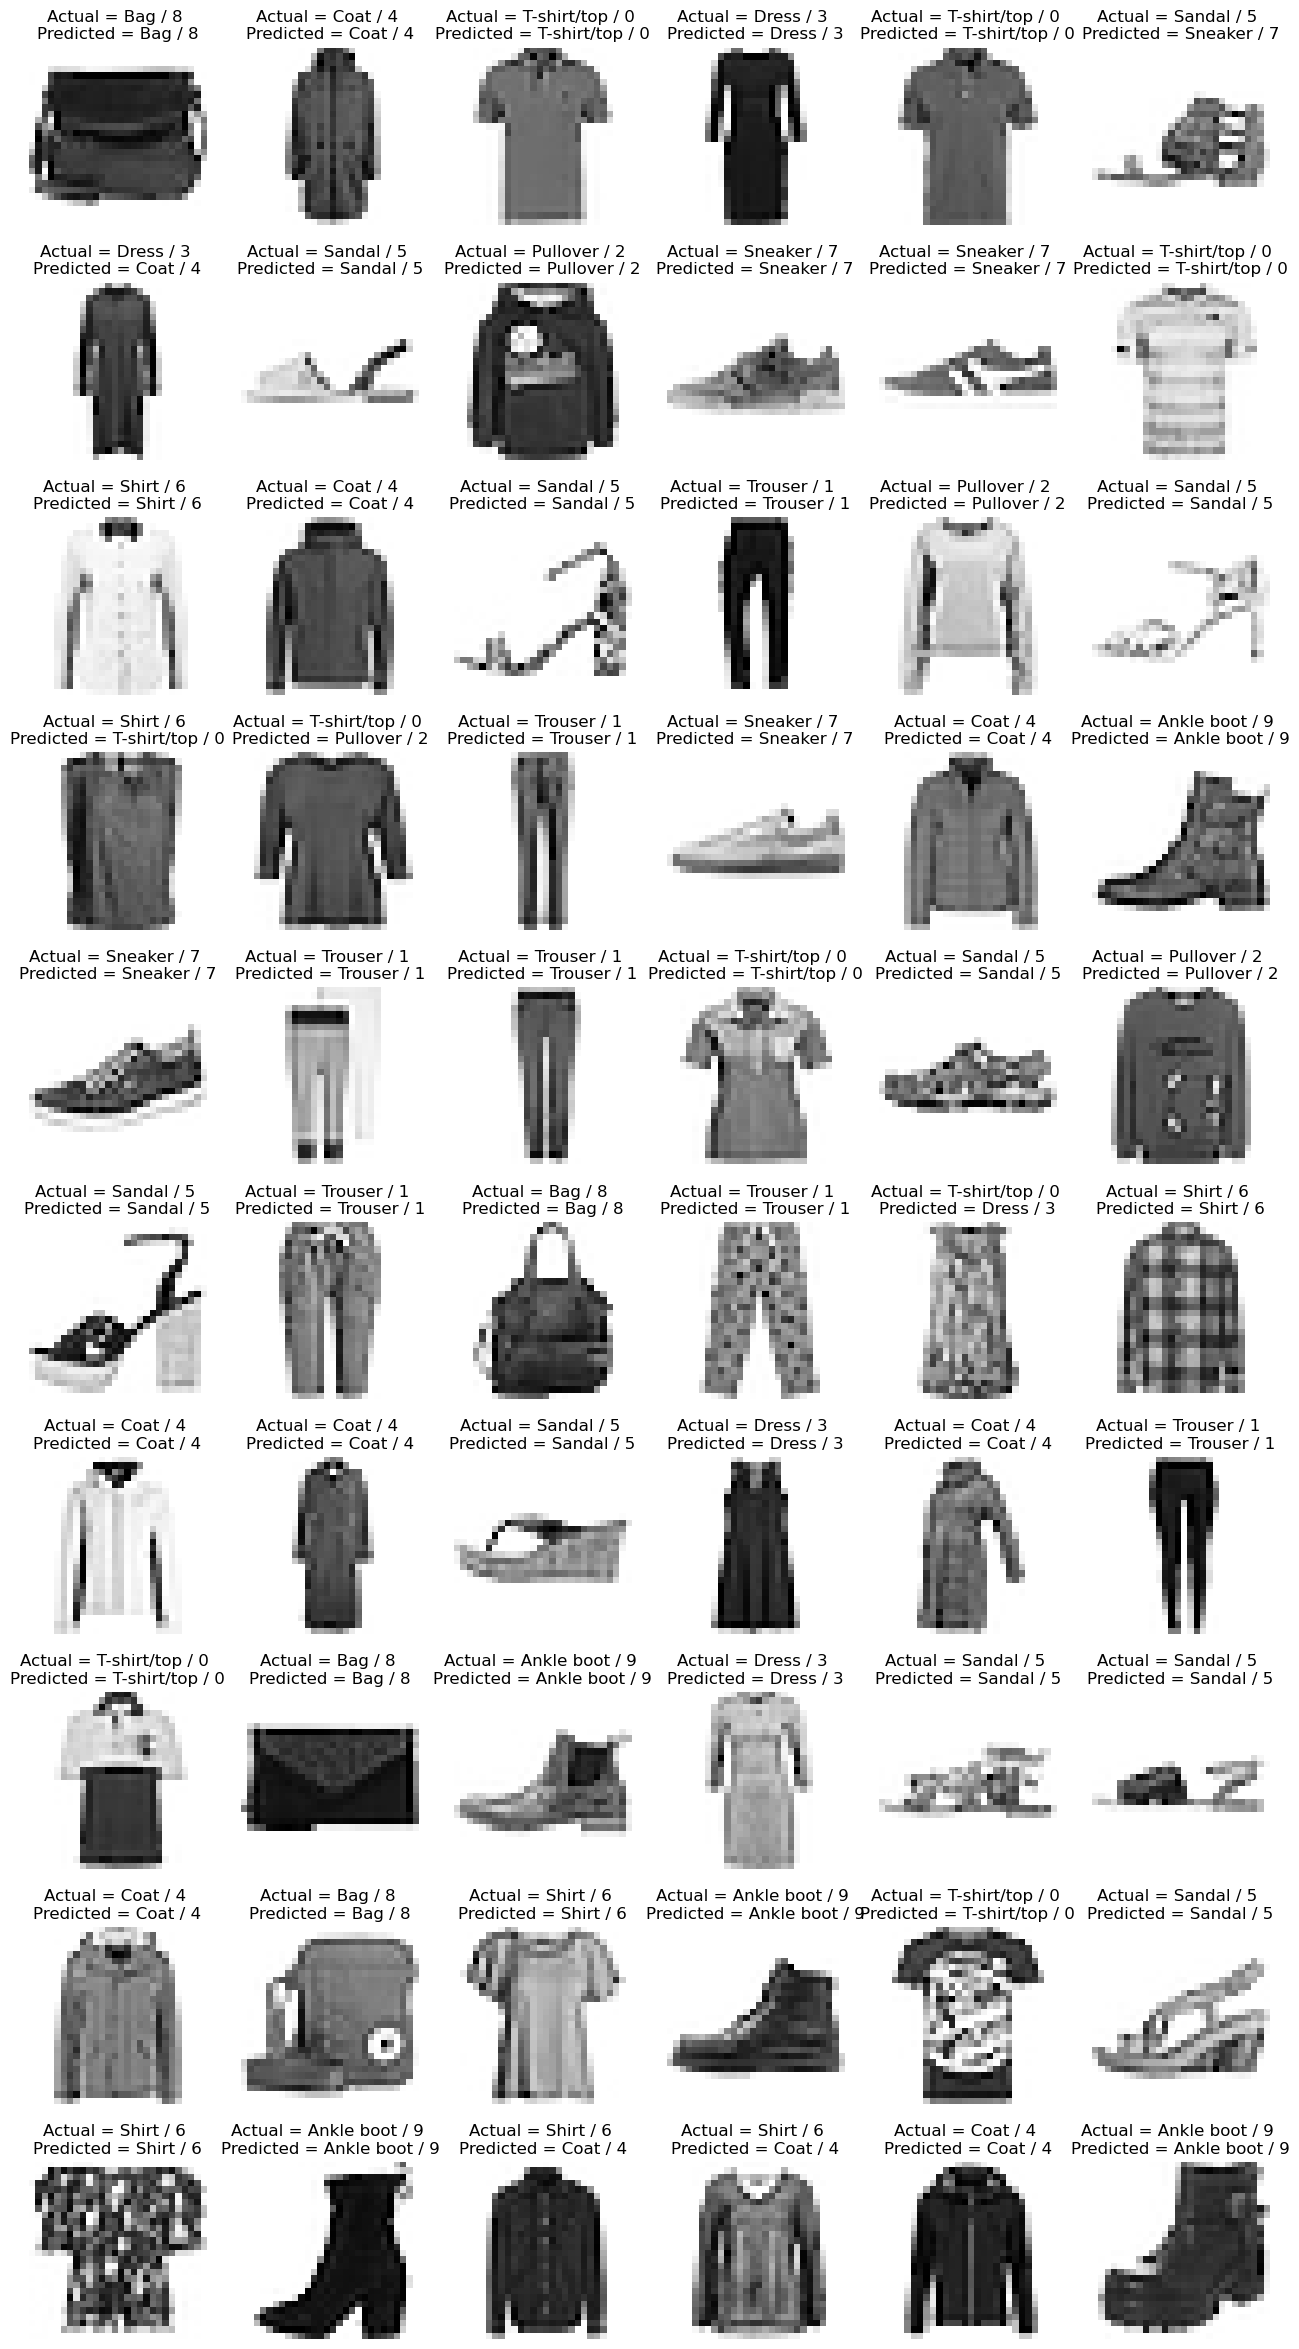

In [35]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [36]:
from sklearn.metrics import confusion_matrix
 
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

<AxesSubplot:>

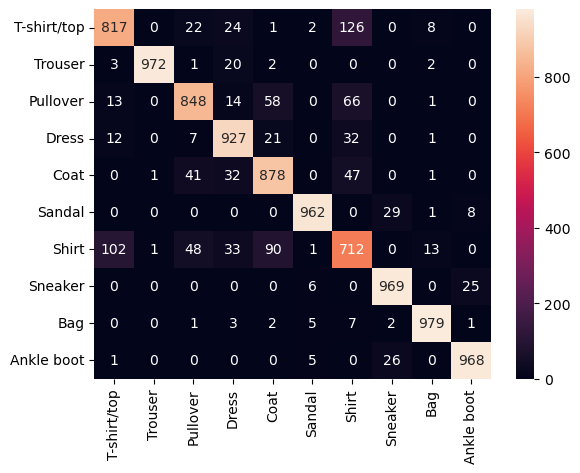

In [37]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [38]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.88      0.85      0.86      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.83      0.88      0.86      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.71      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [51]:
cnn_model3.save('1stbackup_fashion_mnist_cnn_model.h5') # Save model

In [40]:
fashion_mnist_cnn_model = tk.models.load_model('1stbackup_fashion_mnist_cnn_model.h5')
 
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]

1/1 [==============================] - 0s 83ms/step


9

In [41]:
#flollowing code is for converting the .h5 format to IR format for openvino


In [42]:
import logging
log = logging.getLogger("openvino")

In [43]:
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
!sudo apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" | sudo tee /etc/apt/sources.list.d/intel-openvino-2021.list
!sudo apt update > /dev/null $2>&1
!sudo apt install intel-openvino-dev-ubuntu20-2021.3.394 -y > /dev/null $2>&1
!bash /opt/intel/openvino_2021/bin/setupvars.sh

--2023-07-14 08:34:36--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 23.223.187.123, 2600:1406:2e00:38f::4b23, 2600:1406:2e00:3a3::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|23.223.187.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.5’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2023-07-14 08:34:36 (21.4 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.5’ saved [939/939]

Dear User,

this server does not allow you to run "sudo".

If you need to install a dependency, please put it in your home directory.
* For autotools, you can do it with "./configure --prefix=~/my-path"
* For Python packages, use "pip install <package_name> --user" or create a Conda environment.

Sincerely,
Admins
u194070 is not in the sudoers file.  This incident will be reported.
Dear Us

In [44]:
!python3 -m pip install openvino-dev

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import tensorflow as tf
model = tf.keras.models.load_model("2ndbackup_fashion_mnist_cnn_model.h5")
tf.saved_model.save(model,'model')

2023-07-14 08:34:41.678593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,7,7,64]
	 [[{{node inputs}}]]
2023-07-14 08:34:41.695837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,3,3,128]
	 [[{{node inputs}}]]
2023-07-14 08:34:41.710911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-1

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [46]:
model.summary()
print(model.layers[0].name, model.layers[0].get_input_shape_at(0))
print(model.layers[-1].name, model.layers[-1].get_output_at(0).name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         2

In [47]:
!pip install openvino

Defaulting to user installation because normal site-packages is not writeable


In [48]:
#I tried it at its almost working but showing minute error in new devices as the location of directory might not be same 

In [49]:
!python3 openvino/model-optimizer/mo_tf.py --1stbackup_fashion_mnist_cnn_model.h5 --input_shape=\[1,28,28\]

python3: can't open file '/home/u194070/openvino/model-optimizer/mo_tf.py': [Errno 2] No such file or directory


In [50]:
!rm -rf *.h5 *.xml *.bin *.mapping model/